In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
import optuna
from sklearn.model_selection import train_test_split

In [2]:
pred_regression = pd.read_csv('./result/prediction_regression.csv')
pred_lgbm = pd.read_csv('./result/prediction_lgbm.csv').drop('Price', axis=1)
pred_rf = pd.read_csv('./result/prediction_RF.csv').drop('Price', axis=1)
pred_pl3 = pd.read_csv('./result/prediction_pl3.csv')
pred_net = pd.read_csv('./result/prediction_net.csv')

In [3]:
merged_df = pd.merge(pred_regression, pred_lgbm, on='ID', how='left')
merged_df = pd.merge(merged_df, pred_rf, on='ID', how='left')
merged_df = pd.merge(merged_df, pred_pl3, on='ID', how='left')
# merged_df = pd.merge(merged_df, pred_net, on='ID', how='left')
merged_df

,ID,Price,pred_pl2,pred_Lasso,pred_Ridge,pred_lgbm,Количество комнат,Площадь общая,Год постройки,pred_RF,pred_pl3
0,3209254,147000.0,307796.638125,185476.800362,185414.703455,177865.626972,3.0,81.0,2015.0,178312.807,73317.752061
1,3228478,174900.0,118304.622406,153048.578044,153312.295218,153926.702915,3.0,70.0,2010.0,134769.600,73317.752061
2,3252199,167500.0,190859.314778,139122.430599,139340.074796,150137.106927,3.0,91.5,2010.0,157671.135,73317.752061
3,2830692,151800.0,156002.550476,145329.488534,145343.266533,134709.256373,2.0,75.9,2023.0,160004.196,55584.891979
4,3189739,117700.0,109127.247093,142455.379521,142765.405837,129703.241690,2.0,42.0,2022.0,101418.220,55584.891979
...,...,...,...,...,...,...,...,...,...,...,...
3218,3254162,54900.0,44971.387332,45566.409158,45798.054098,53429.187917,2.0,53.6,1987.0,66170.607,66285.894201
3219,3212275,31000.0,19944.464792,25371.000448,25496.378409,32996.264595,1.0,31.0,1979.0,24136.397,45126.083019
3220,3115929,125000.0,146698.348400,146674.421363,146631.347690,107441.280845,2.0,55.1,1956.0,116570.900,55584.891979
3221,3212250,40200.0,45107.119101,50951.043506,51086.734612,49732.339727,2.0,43.8,1967.0,48297.240,55584.891979


In [11]:
merged_df['Price'].median()

52500.0

In [12]:
merged_df['Price'].mean()

64042.167545764816

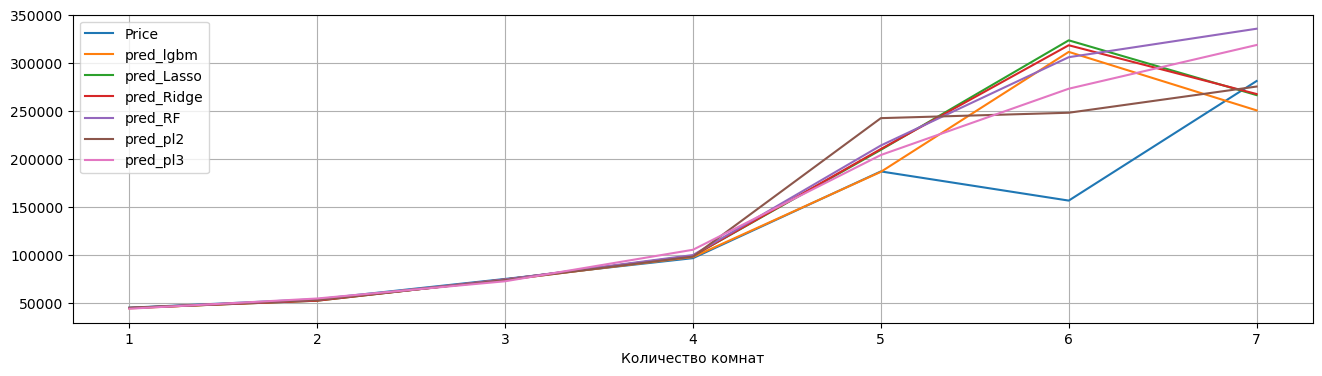

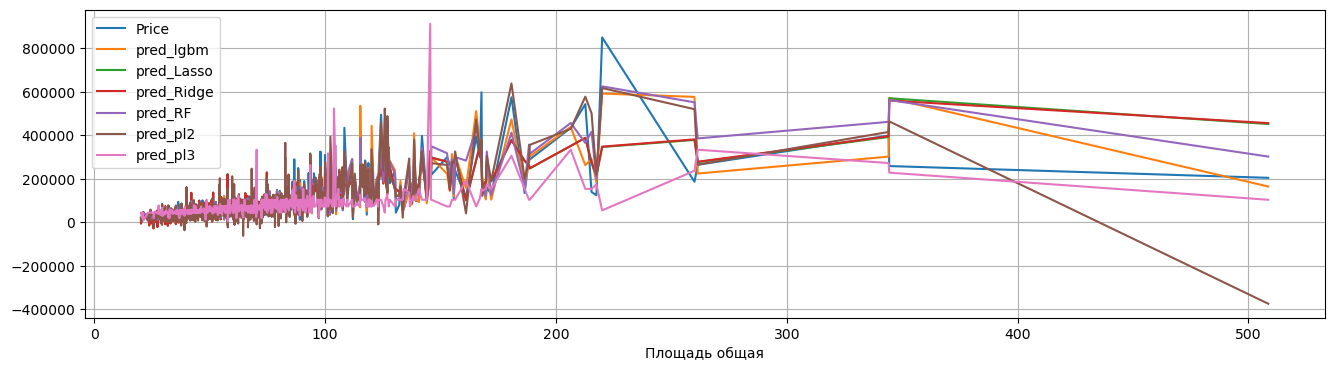

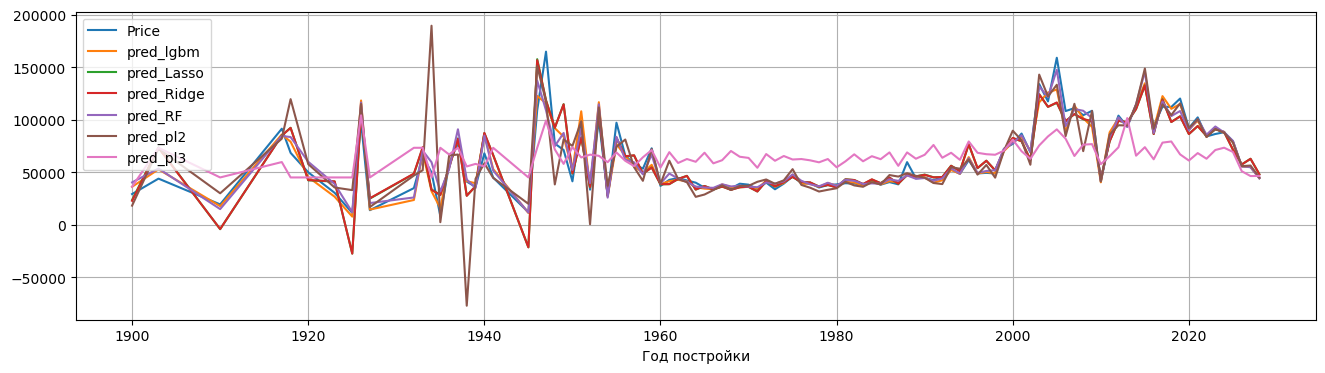

In [4]:
merged_df.groupby('Количество комнат')[['Price','pred_lgbm','pred_Lasso','pred_Ridge','pred_RF','pred_pl2','pred_pl3']].mean().plot(figsize=(16, 4))
plt.grid(True)
plt.show()

merged_df.groupby('Площадь общая')[['Price','pred_lgbm','pred_Lasso','pred_Ridge','pred_RF','pred_pl2','pred_pl3']].mean().plot(figsize=(16, 4))
plt.grid(True)
plt.show()

merged_df.groupby('Год постройки')[['Price','pred_lgbm','pred_Lasso','pred_Ridge','pred_RF','pred_pl2','pred_pl3']].mean().plot(figsize=(16, 4))
plt.grid(True)
plt.show()

In [5]:
def loss(prediction, name=None):
    print(f'\033[0mModel - \033[33m{name}')
    y_true = merged_df['Price']
    RMSE = root_mean_squared_error(y_true, prediction)
    MSE = mean_squared_error(y_true, prediction)
    MAE = mean_absolute_error(y_true, prediction)
    R2_score = r2_score(y_true, prediction)

    print(f'\033[0mRMSE = \033[36m{RMSE:.3f}\033[0m, MSE = \033[36m{MSE:.3f}')
    print(f'\033[0mMAE = \033[36m{MAE:.3f}\033[0m, R2_score = \033[36m{R2_score:.3f}\n')


In [6]:
pred_columns = [col for col in merged_df.columns if 'pred' in col]
loss(merged_df['pred_lgbm'], name='pred_lgbm')
loss(merged_df['pred_Lasso'], name='pred_Lasso')
loss(merged_df['pred_Ridge'], name='pred_Ridge')
loss(merged_df['pred_RF'], name='pred_RF')
loss(merged_df['pred_pl2'], name='pred_pl2')
loss(merged_df['pred_pl3'], name='pred_pl3')

Model - pred_lgbm
RMSE = 19666.317, MSE = 386764037.960
MAE = 7188.626, R2_score = 0.856

Model - pred_Lasso
RMSE = 25340.664, MSE = 642149233.302
MAE = 12328.839, R2_score = 0.760

Model - pred_Ridge
RMSE = 25303.661, MSE = 640275280.418
MAE = 12339.703, R2_score = 0.761

Model - pred_RF
RMSE = 20844.463, MSE = 434491653.549
MAE = 7682.980, R2_score = 0.838

Model - pred_pl2
RMSE = 31151.485, MSE = 970415045.835
MAE = 15592.065, R2_score = 0.638

Model - pred_pl3
RMSE = 48139.299, MSE = 2317392124.403
MAE = 28008.112, R2_score = 0.135



In [7]:
merged_df['ensemble'] = merged_df[pred_columns].mean(axis=1)
loss(merged_df['ensemble'], name='ensemble')


Model - ensemble
RMSE = 21719.240, MSE = 471725389.318
MAE = 9658.065, R2_score = 0.824



In [8]:
df = merged_df.drop(['ID', 'Количество комнат', 'Площадь общая', 'Год постройки'],axis=1)

def objective(trial):
    # Генерируем веса для наших моделей
    w1 = trial.suggest_float('w1', 0, 1)
    w2 = trial.suggest_float('w2', 0, 1)
    w3 = trial.suggest_float('w3', 0, 1)
    w4 = trial.suggest_float('w4', 0, 1)
    w5 = trial.suggest_float('w5', 0, 1)
    w6 = trial.suggest_float('w6', 0, 1)
    
    # Нормализация весов
    total = w1 + w2 + w3 + w4 + w5 + w6
    w1, w2, w3, w4, w5, w6 = w1 / total, w2 / total, w3 / total, w4 / total, w5 / total, w6 / total
    
    # Вычисление взвешенного среднего предсказаний моделей
    blended_pred = w1 * df['pred_Lasso'] + w2 * df['pred_pl2'] + w3 * df['pred_pl3'] + \
                + w4 * df['pred_Ridge'] + w5 * df['pred_RF'] + w6 * df['pred_lgbm']
    
    # Расчет RMSE
    rmse = np.sqrt(mean_squared_error(df['Price'], blended_pred))
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Выводим результаты
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

best_weights = study.best_trial.params

# Вы можете использовать оптимальные веса для предсказания на тестовом наборе данных
optimal_pred = (best_weights['w1'] * df['pred_Lasso'] +
                best_weights['w2'] * df['pred_pl2'] +
                best_weights['w3'] * df['pred_pl3'] +
                best_weights['w4'] * df['pred_Ridge'] +
                best_weights['w5'] * df['pred_RF'] +
                best_weights['w6'] * df['pred_lgbm'])

# После нормализации весов
total = sum(best_weights.values())
optimal_pred = optimal_pred / total

# Расчет и вывод финального RMSE для тестовой выборки
final_rmse = np.sqrt(mean_squared_error(df['Price'], optimal_pred))
print(f"Final RMSE on test data: {final_rmse}")


[I 2024-03-04 13:13:02,638] A new study created in memory with name: no-name-5f115597-58f5-4d62-b945-58df2db6429b
[I 2024-03-04 13:13:02,647] Trial 0 finished with value: 24310.96141392397 and parameters: {'w1': 0.6634215102155834, 'w2': 0.06589894878401914, 'w3': 0.6848285025856401, 'w4': 0.6887807443323126, 'w5': 0.061796348075763174, 'w6': 0.66704900906626}. Best is trial 0 with value: 24310.96141392397.
[I 2024-03-04 13:13:02,654] Trial 1 finished with value: 21801.728857003727 and parameters: {'w1': 0.6837044630967232, 'w2': 0.16023598912083792, 'w3': 0.18269746791853414, 'w4': 0.29674112660077556, 'w5': 0.3683393114522445, 'w6': 0.2093166956753978}. Best is trial 1 with value: 21801.728857003727.
[I 2024-03-04 13:13:02,663] Trial 2 finished with value: 23018.343623230583 and parameters: {'w1': 0.47314225521788067, 'w2': 0.2179699926009835, 'w3': 0.6590445743800173, 'w4': 0.004952964126524573, 'w5': 0.44924140401049595, 'w6': 0.6696215153842345}. Best is trial 1 with value: 21801.

Number of finished trials: 200
Best trial: {'w1': 0.04648933825850023, 'w2': 0.198283939254712, 'w3': 0.0025587494811122255, 'w4': 0.1518844886850517, 'w5': 0.6148117108882851, 'w6': 0.9784887494835803}
Final RMSE on test data: 18926.562908422075


In [13]:
loss(optimal_pred, name='ensemble')

Model - ensemble
RMSE = 18926.563, MSE = 358214783.526
MAE = 7099.883, R2_score = 0.866

